**Assignment-2**

Name : Mudit sand

Roll No. : 203100068

Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Dataset link: (given in assignment pdf)

Train : https://drive.google.com/file/d/1-E-EfSZcREnhyMe23tluDmzNnS2pWSE_/view?usp=sharing

Test : https://drive.google.com/file/d/1-498FRSmoGj1AqpuPIHU5P8tIwuHEzN1/view?usp=sharing

Please upload the both files.

In [2]:
from google.colab import files
dataTrainTest = files.upload()

Saving test.csv to test.csv
Saving Train.csv to Train.csv


Part 1 and 2:
Data Exploration, visualization and feature elimination.

Reading the Train and Test dataset.

**Please change the path accordingly.**

In [48]:
dataTrain = pd.read_csv('/content/Train.csv')
dataTest = pd.read_csv('/content/test.csv')


Getting the information about the dataset.

In [5]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

We can see that out of 41 features 31 are not continuous type (i.e. Object).

Also schemename has lots of null entries.

1) we will drop the scheme_name because it is good to remove the coloumn than filling these many missing values.

2) id and date will not have any impact on the pump's functionality.

In [49]:
dataTrain = dataTrain.drop(columns=['id','scheme_name','date_recorded'])
dataTest = dataTest.drop(columns=['id','scheme_name','date_recorded'])

Following coloumns has their multiple representative in the features... 

'waterpoint_type', 'source', 'source_type', 'quantity', 'water_quality', 'payment', 'management', 'extraction_type', 'extraction_type_group'

So we have taken the one into the dataset for furthe exploration and dropping these.

In [50]:
dataTrain = dataTrain.drop(columns=['waterpoint_type','source','source_type','quantity','water_quality','payment','management','extraction_type','extraction_type_group'])
dataTest = dataTest.drop(columns=['waterpoint_type','source','source_type','quantity','water_quality','payment','management','extraction_type','extraction_type_group'])

Since Installer will have more impact that funder so I have dropped the funder coloumn.

Also subvillage and region information is code at multiple places like Lattitude longitude basin region code and district code so dropping the two more columns based on the duplicatcy of the information through multiple columns.

In [51]:
dataTrain = dataTrain.drop(columns=['funder','subvillage','region'])
dataTest = dataTest.drop(columns=['funder','subvillage','region'])

Now taking the Target column "status_group" and storing these values in different variables.

In [52]:
ytargets = dataTrain['status_group']


In [10]:
print(ytargets)

0            functional
1            functional
2        non functional
3            functional
4            functional
              ...      
44545        functional
44546    non functional
44547        functional
44548        functional
44549        functional
Name: status_group, Length: 44550, dtype: object


Since this variable is categorical so I need to convert it using below options.

1) One hot encoding
2) Ordinal encoder
3) Label encoder

I am using the label encoder for the encoding of the categorical features.

In [53]:
dataTrain = dataTrain.drop(columns = ['status_group'])  ### Droping the status group from the features since it is target.

Performing Label encoding.

In [54]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytargets)

In [13]:
print(ytrain)


[0 0 2 ... 0 0 0]


We can see that label given are 0, 1, and 2 .
by next using inverse_transform one can find which label is used for which value.

In [55]:
le.inverse_transform([0, 2, 1])

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

Now using this procedure to encode all other categorical variables.

In [56]:
for col in dataTrain:
  if dataTrain[col].dtype == object :
    le = preprocessing.LabelEncoder()
    dataTrain['{}'.format(col)]=le.fit_transform(dataTrain['{}'.format(col)].astype(str))


same above procedure on test data.

In [57]:
for col in dataTest:
  if dataTest[col].dtype == object :
    le = preprocessing.LabelEncoder()
    dataTest['{}'.format(col)]=le.fit_transform(dataTest['{}'.format(col)].astype(str))


In [17]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   installer              44550 non-null  int64  
 3   longitude              44550 non-null  float64
 4   latitude               44550 non-null  float64
 5   wpt_name               44550 non-null  int64  
 6   num_private            44550 non-null  int64  
 7   basin                  44550 non-null  int64  
 8   region_code            44550 non-null  int64  
 9   district_code          44550 non-null  int64  
 10  lga                    44550 non-null  int64  
 11  ward                   44550 non-null  int64  
 12  population             44550 non-null  int64  
 13  public_meeting         44550 non-null  int64  
 14  recorded_by            44550 non-null  int64  
 15  sc

Now one can see all the object data types are replaced with numerical datatypes also missing values are replaced, since this replacement may not correct but since the dataset is large and the missing values are small so It should not create problem for accuracy of our models.

Next: 

we will visulize the coloumns by their histograms.

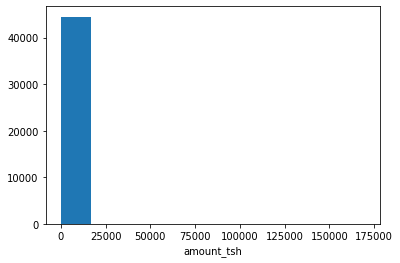

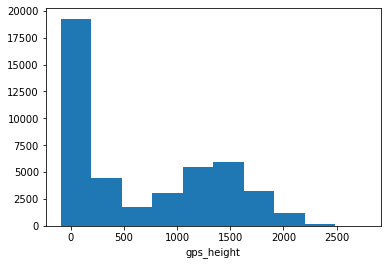

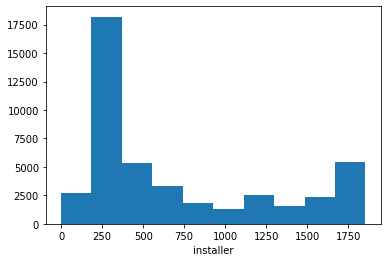

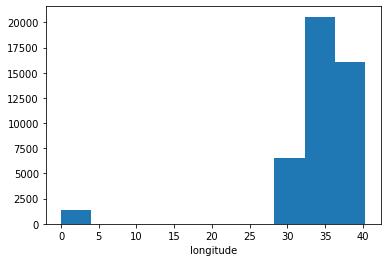

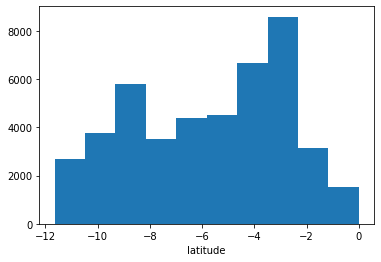

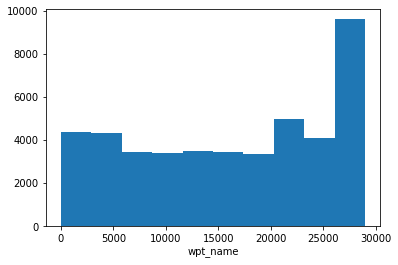

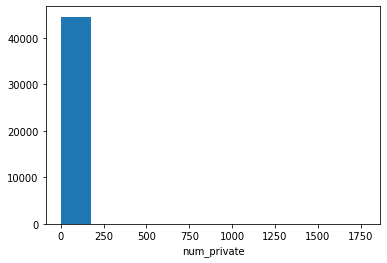

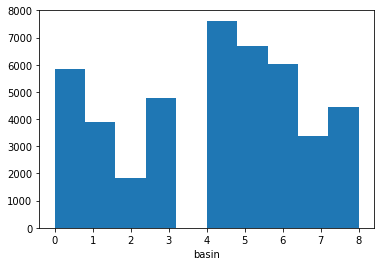

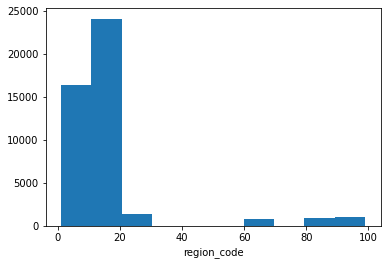

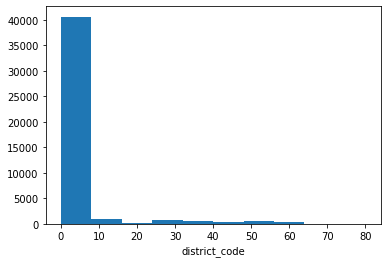

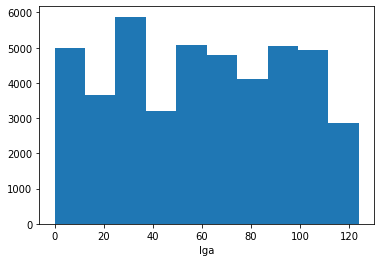

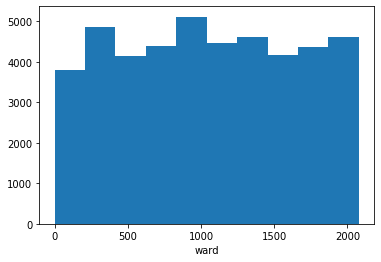

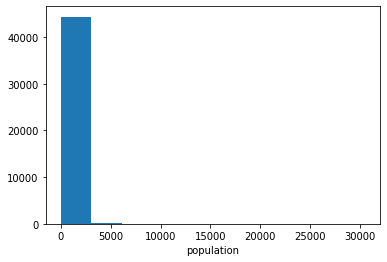

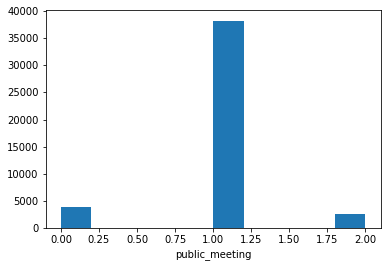

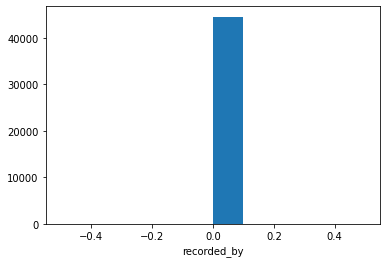

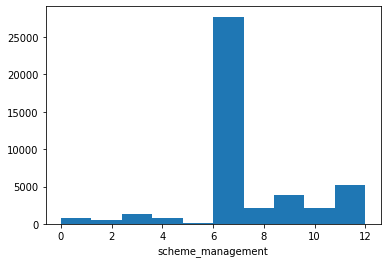

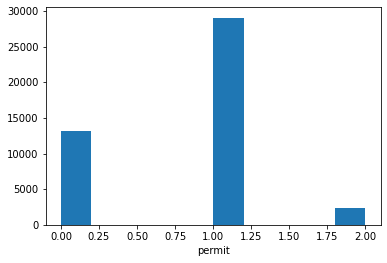

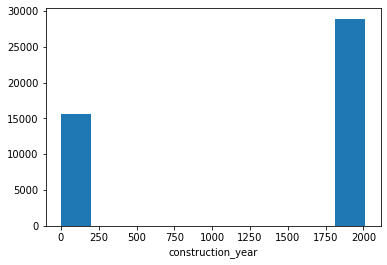

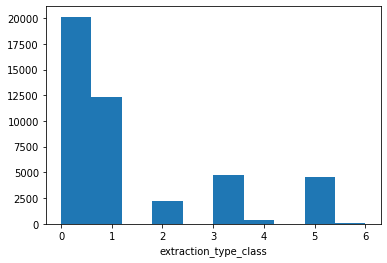

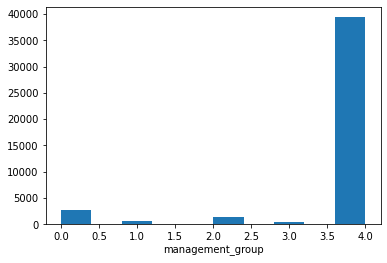

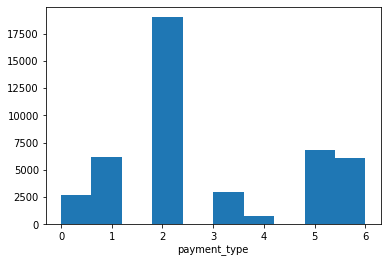

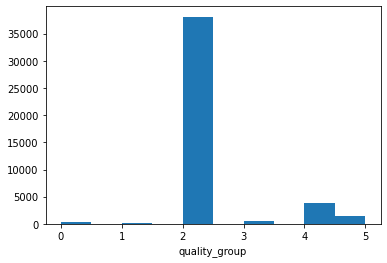

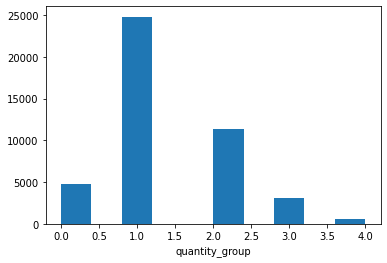

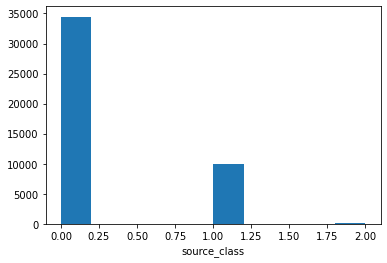

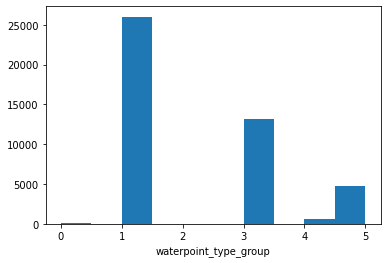

In [18]:
for col in dataTrain.columns.values :
  plt.hist(dataTrain[col])
  plt.xlabel(col)
  plt.show()

Observation : 

One can see that amount_tsh, recorded_by , population and num_private dont have the spread in their histograms.

By using correlation next we will see if we can drop any coloumns.

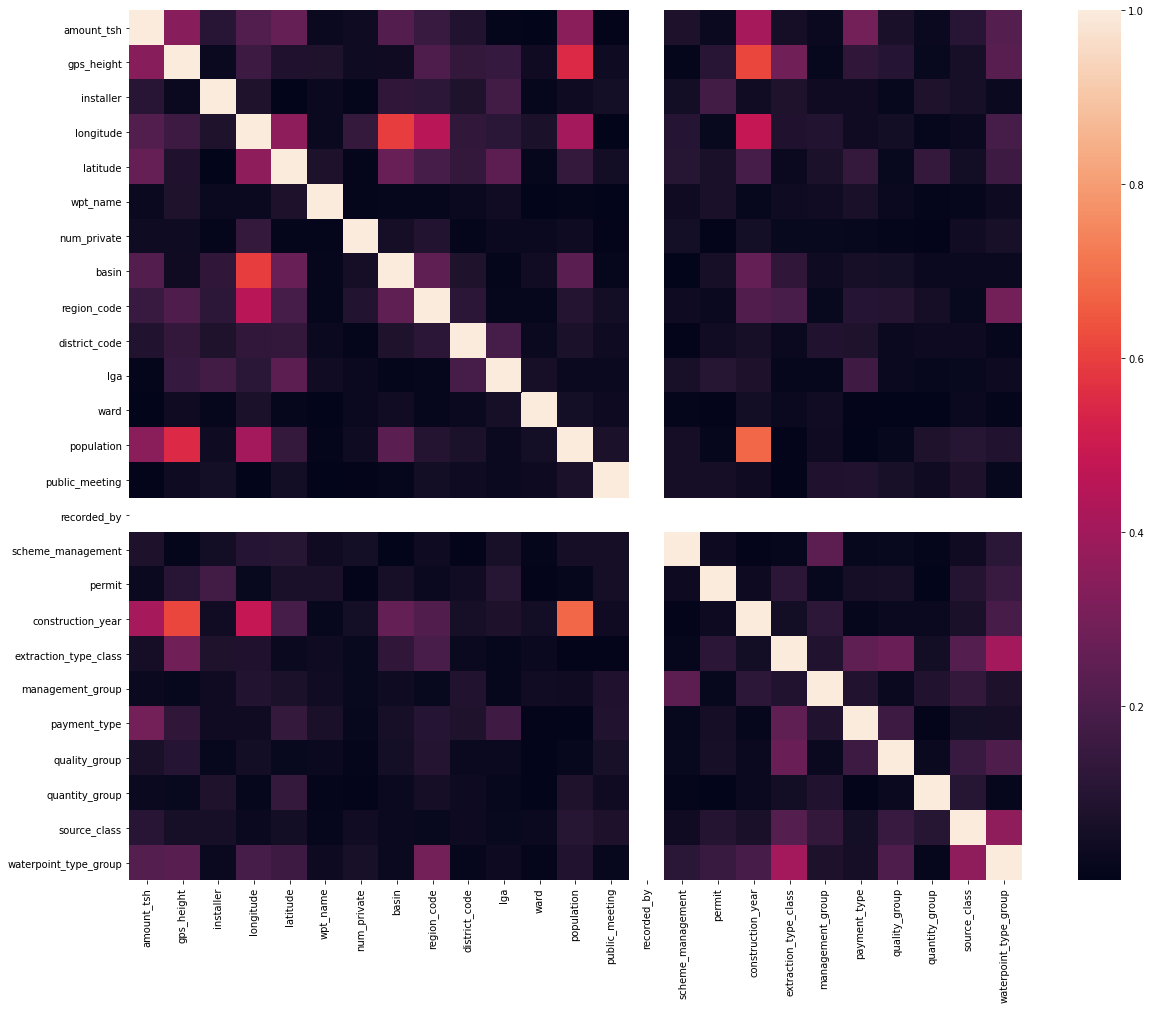

In [19]:
corrMatrix = dataTrain.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

Looks like recorded_by only have one unique value in the whole data.

In [58]:
dataTrain['recorded_by'].unique()

array([0])

We can see there is only one value so we can drop this coloumn.

Next dropping the recorded_by coloumn.

In [59]:
dataTrain = dataTrain.drop(columns='recorded_by')
dataTest = dataTest.drop(columns='recorded_by')

Normalizing the data:

Though there are most of categorical features but due to large size of the data it is good to normalize since there are some coloumns like year and lattitude longitude which has the large variation among them.

Also I have splitted the data using train_test split just the sake for validation Since test data is given seperately.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(dataTrain, ytrain, test_size=0.33)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
train_x = pd.DataFrame(scaler.transform(X_train))
train_y = pd.DataFrame(y_train)
validation_x = pd.DataFrame(scaler.transform(X_validation))
validation_y = pd.DataFrame(y_validation)

Part-3 :- Declaration of Machine learning framework

Importing the classification Machine learning libraries.
Will do the parameter tuning using GridSearchCV.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

scoring = make_scorer(f1_score, average = 'weighted')

Prior Hypothesis :

I will use Random Forest classifier due to its following advantages:-

1) Has the power to handle largedatasets.

2) accuracy not impacted much by the missing data

3) Wont allow overfitting trees in model

4) Has higher accuracy through cross validation.

Source of motivation:-

https://www.newgenapps.com/blog/random-forest-analysis-in-ml-and-when-to-use-it/

In [36]:

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[5,10,20,30], 'n_estimators':[200,300,400]}
clf = GridSearchCV(rfc, param_grid = hyperparameters, scoring = scoring)
clf.fit(np.array(train_x),np.squeeze(train_y))


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

Looking for the best parameters of model fitting after the hyperparameter tuning through GridsearchCV.

In [37]:
print('Best parameters')
print(clf.best_params_)
print('Best score')
print(clf.best_score_)
print('validation classification Report')
print(classification_report(validation_y, clf.predict(validation_x)))


Best parameters
{'max_depth': 30, 'n_estimators': 300}
Best score
0.7820037221142077
validation classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      7986
           1       0.50      0.31      0.38      1042
           2       0.83      0.77      0.80      5674

    accuracy                           0.80     14702
   macro avg       0.71      0.65      0.67     14702
weighted avg       0.79      0.80      0.79     14702



Writing the Predicted label in a csv file.
I will find predicted labels for all the three models i run though on moodle I will submit the file with the labels which are generated by the model which have the highest validation accuracy.

**Run the next coloumn once ... SInce it is removing the coloumn using index so if one mistakely runs two time then two coloums will be dropped which will cause error.**

In [61]:
## Since the coloumns which needs to be dropped has already been dropped through test data.
## We need to transform the test data.
dataTest = dataTest.drop(dataTest.iloc[:,0:1], axis= 1) # since first coloumn is unnamed counter
test_x = pd.DataFrame(scaler.transform(dataTest))


After Running through all the following models in the notebook it is found that Random forest is giving best accuracy.... SO writing these labels to csv file.

Part 7: Final labels
(Though further reduction of features will help us save the computation powwe but accuracy and classification report is coming same so we can download these labels itself.)

In [69]:
#Writing to csv.
test_y = clf.predict(test_x)
## While label encoding of status check
## 0 = functional
## 1 = functional needs repair
## 2 = non functional
labels = []
for value in test_y:
  if value == 0 :
    labels.append('functional')
  elif value == 1:
    labels.append('functional needs repair')
  elif value == 2:
    labels.append('non functional')
labels = pd.Series(data=labels)
labels.to_csv('labels.csv', header = False , index = False)

Part-5 : Relative importance of features (For part-4 : hyperparameter tuning of another two ML models is at last. Here all calculation of feature importance is done for random forest since This has highest accuracy ... come to know after running all three models though.)

Finding the importance of features.

Motivation: (for using permuation feature importance over model.feature_importance_)

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance



In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, train_x, train_y, n_repeats=10,
                                random_state=0)


In [73]:
print(result.importances_mean)

[0.01473499 0.04187719 0.03228963 0.07116999 0.05205243 0.03031823
 0.00041217 0.02467436 0.03229604 0.02925431 0.04122171 0.03140588
 0.01900518 0.00788795 0.02338533 0.01095668 0.0624904  0.06814234
 0.00630986 0.0437317  0.01102936 0.13084641 0.013449   0.0708566 ]


It can be seen that feature no. 7, 14, 19 has least importance also feature no. 16 and 21 has less importance.
Next we will drop these coloumn by index.
**Please execute the next cell once otherwise index droppinng creat problem**

In [78]:
train_x = train_x.drop(train_x.iloc[:,[6,13,15,18,20]], axis= 1)
print(train_x.shape)

(29848, 19)


In [81]:
validation_x = validation_x.drop(validation_x.iloc[:,[6,13,15,18,20]], axis= 1)

Now again using Random Forest classifier on this reduced labels.

In [79]:
rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[5,10,20,30], 'n_estimators':[200,300,400]}
clf = GridSearchCV(rfc, param_grid = hyperparameters, scoring = scoring)
clf.fit(np.array(train_x),np.squeeze(train_y))


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [82]:
print('Best parameters')
print(clf.best_params_)
print('Best score')
print(clf.best_score_)
print('validation classification Report')
print(classification_report(validation_y, clf.predict(validation_x)))


Best parameters
{'max_depth': 20, 'n_estimators': 300}
Best score
0.7822149497222671
validation classification Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      7873
           1       0.56      0.26      0.36      1055
           2       0.84      0.75      0.80      5774

    accuracy                           0.80     14702
   macro avg       0.73      0.64      0.66     14702
weighted avg       0.79      0.80      0.79     14702



since Weighted avg is same and not much difference in classification report so removing these 5 columns will save the computaition power withoutimpacting the accuracy.

**SInce accuracy is almost same so label generated before will work.**

Part - 6 : visualization of decision boundary using tsne.

In [83]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(train_x)
X_embedded.shape

(29848, 2)

Source for Visualization : 
https://stackoverflow.com/questions/37718347/plotting-decision-boundary-for-high-dimension-data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


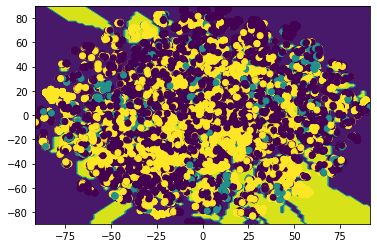

In [85]:
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.linear_model.logistic import LogisticRegression
model = LogisticRegression().fit(train_x,train_y)
y_predicted = model.predict(train_x)

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_embedded[:,0]), np.max(X_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_embedded[:,1]), np.max(X_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=train_y)
plt.show()

Decision boundary after feature reduction to two doesn't look great

**Next cell is for SVM and I had run this about almost 4 hrs in my 8GB RAM Pc and svm doesnot converge during that time. So cant say about the accuracy of this model.**

In [ ]:
from sklearn import svm 
svc = svm.SVC()
hyperparameters = {'kernel':['rbf','linear','poly'], 'C':[.3,5,15], 'degree':[4,7,9]}
clf = GridSearchCV(svc, param_grid = hyperparameters, scoring = scoring)
clf.fit(np.array(train_x), np.squeeze(train_y))

In [ ]:
print('Best parameters')
print(clf.best_params_)
print('Best score')
print(clf.best_score_)
print('validation classification Report')
print(classification_report(validation_y, clf.predict(validation_x)))
print('validation AUC-ROC : ')
print(roc_auc_score(validation_y, clf.predict(validation_x))

In [ ]:
#Writing to csv.
test_y = clf.predict(test_y)
test_y.to_csv('labels.csv')

Next is AdaBoostClassifier.

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
hyperparameters = {'learning_rate':[.3,.6,.9], 'n_estimators':[100,190,350]}
clf = GridSearchCV(abc, param_grid = hyperparameters, scoring = scoring)
clf.fit(np.array(train_x),np.squeeze(train_y))


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.6, 0.9],
                         'n_estimators': [100, 190, 350]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [32]:
print('Best parameters')
print(clf.best_params_)
print('Best score')
print(clf.best_score_)
print('validation classification Report')
print(classification_report(validation_y, clf.predict(validation_x)))


Best parameters
{'learning_rate': 0.9, 'n_estimators': 350}
Best score
0.7016234143524265
validation classification Report
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      7986
           1       0.44      0.06      0.11      1042
           2       0.79      0.62      0.69      5674

    accuracy                           0.73     14702
   macro avg       0.65      0.53      0.53     14702
weighted avg       0.72      0.73      0.71     14702



Ada Boost classifier has the accuracy and f1-score less than the Random Forest so our prior hyopothesis has not discarded yet.

Next is GradientBoostingClassifier.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
hyperparameters = {'learning_rate':[.3,.6,.9], 'n_estimators':[100,190,350]}
clf = GridSearchCV(gbc, param_grid = hyperparameters, scoring = scoring)
clf.fit(np.array(train_x),np.squeeze(train_y))

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [35]:
print('Best parameters')
print(clf.best_params_)
print('Best score')
print(clf.best_score_)
print('validation classification Report')
print(classification_report(validation_y, clf.predict(validation_x)))

Best parameters
{'learning_rate': 0.3, 'n_estimators': 350}
Best score
0.7583312233679378
validation classification Report
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      7986
           1       0.54      0.24      0.33      1042
           2       0.82      0.71      0.76      5674

    accuracy                           0.78     14702
   macro avg       0.71      0.62      0.64     14702
weighted avg       0.77      0.78      0.77     14702



This is giving accuracy comparable to Random forest but still random forest is the best one.

So **our Prior Hypothesis is true**.